In [6]:
! pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/de/ea/90267db2c02fb61f4d03b9645c7446d3cbca6d5c08522e889535c88edfcd/tensorflow-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.14.0 from https://files.pythonhosted.org/packages/d3/4b/ae9037ea22ba94eb2cf267e991384c3444f3e6142fa49923352b4ab73e14/tensorflow_macos-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-non

  Obtaining dependency information for werkzeug>=1.0.1 from https://files.pythonhosted.org/packages/c3/fc/254c3e9b5feb89ff5b9076a23218dafbc99c96ac5941e900b71206e6313b/werkzeug-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.5.0-py2.py3-none-any.whl (83 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 MB 10.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.3 MB/s eta 0:00:0000:01
Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
Using cached flatbuffers-23.5.26-py2.py3-none-any.whl 

In [2]:
import tensorflow as tf
from keras.layers import Input, Conv1D, LSTM, Dense, Reshape, Concatenate, Attention, Reshape
from keras.models import Model
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
df = pd.read_csv('truncated_LOB_data_BTC_USD_COINBASE.csv')

In [5]:
def finder_of_fulfilment(df, column):
    counter = []
    for i in range(len(df)):
        num = df[column].iloc[i]
        arr = df[df[column]>num][column].index
        counter.append(df['timestamp'].iloc[arr[arr>i][0]] if len(arr[arr>i]) else -1)
    return counter

In [6]:
df['counter'] = finder_of_fulfilment(df, 'ask_prices_0')
df

,timestamp,bid_prices_0,ask_prices_0,bid_quantity_0,ask_quantity_0,bid_prices_1,ask_prices_1,bid_quantity_1,ask_quantity_1,bid_prices_2,...,ask_quantity_2,bid_prices_3,ask_prices_3,bid_quantity_3,ask_quantity_3,bid_prices_4,ask_prices_4,bid_quantity_4,ask_quantity_4,counter
0,2023-10-02 00:00:00.047811072,27995.45,27995.46,2.969115,0.171891,27994.28,27996.67,0.115522,0.020000,27994.26,...,0.001200,27993.74,27998.00,0.042005,0.500000,27993.73,27998.06,0.186802,0.161504,2023-10-02 00:00:04.334932992
1,2023-10-02 00:00:00.199801088,27995.45,27995.46,2.969115,0.171891,27994.28,27996.67,0.078016,0.020000,27994.26,...,0.001200,27993.74,27998.00,0.042005,0.500000,27993.73,27998.06,0.186802,0.161504,2023-10-02 00:00:04.334932992
2,2023-10-02 00:00:00.242750976,27995.45,27995.46,2.969115,0.421891,27994.28,27996.67,0.078016,0.020000,27994.26,...,0.001200,27993.74,27998.00,0.042005,0.500000,27993.73,27998.06,0.186802,0.161504,2023-10-02 00:00:04.334932992
3,2023-10-02 00:00:00.303438848,27995.45,27995.46,2.969115,0.421891,27994.28,27996.67,0.078016,0.020000,27994.26,...,0.040000,27993.74,27997.99,0.042005,0.001200,27993.73,27998.00,0.186802,0.500000,2023-10-02 00:00:04.334932992
4,2023-10-02 00:00:00.395410176,27995.45,27995.46,2.969115,0.420490,27994.28,27996.67,0.078016,0.020000,27994.26,...,0.040000,27993.74,27997.99,0.042005,0.001200,27993.73,27998.00,0.186802,0.500000,2023-10-02 00:00:04.334932992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103081,2023-10-02 00:10:12.153671936,27968.27,27970.24,0.171501,0.020000,27968.26,27970.25,0.020000,0.053564,27967.98,...,0.053628,27967.27,27971.29,0.271732,0.214506,27966.76,27971.32,0.452887,0.028795,-1
103082,2023-10-02 00:10:12.154450944,27968.28,27970.24,0.158101,0.020000,27968.27,27970.25,0.171501,0.053564,27968.26,...,0.053628,27967.98,27971.29,0.072000,0.214506,27967.27,27971.32,0.271732,0.028795,-1
103083,2023-10-02 00:10:12.158212864,27968.28,27970.24,0.158101,0.020000,27968.27,27970.25,0.171501,0.053564,27968.26,...,0.053628,27967.98,27971.29,0.072000,0.214506,27967.28,27971.32,0.040000,0.028795,-1
103084,2023-10-02 00:10:12.158674944,27968.28,27970.24,0.158101,0.020000,27968.27,27970.25,0.171501,0.053564,27968.26,...,0.053628,27967.98,27971.28,0.072000,0.040000,27967.28,27971.29,0.040000,0.214506,-1


In [7]:
df = df[df['counter'] != -1]

In [8]:
df['counter'] = pd.to_datetime(df['counter'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['exec_time'] = (df['counter'] - df['timestamp']).dt.total_seconds().astype(int)
df = df.iloc[0:-140]

/var/folders/xz/t8gqtcmx7p3f64t45x767k8m0000gn/T/ipykernel_72070/1999808099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['counter'] = pd.to_datetime(df['counter'])
/var/folders/xz/t8gqtcmx7p3f64t45x767k8m0000gn/T/ipykernel_72070/1999808099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])
/var/folders/xz/t8gqtcmx7p3f64t45x767k8m0000gn/T/ipykernel_72070/1999808099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [9]:
#Make some features and drop useless columns 
df.drop(columns = ['timestamp', 'counter'], inplace=True)
pd.options.mode.chained_assignment = None

df['vol_imbalance'] = (df['bid_quantity_0'] - df['ask_quantity_0'])/(df['bid_quantity_0'] + df['ask_quantity_0'])
df['microprice'] = ((df['bid_prices_0']*df['bid_quantity_0']+df['ask_prices_0']*df['ask_quantity_0'])
                    /(df['bid_quantity_0'] + df['ask_quantity_0']))

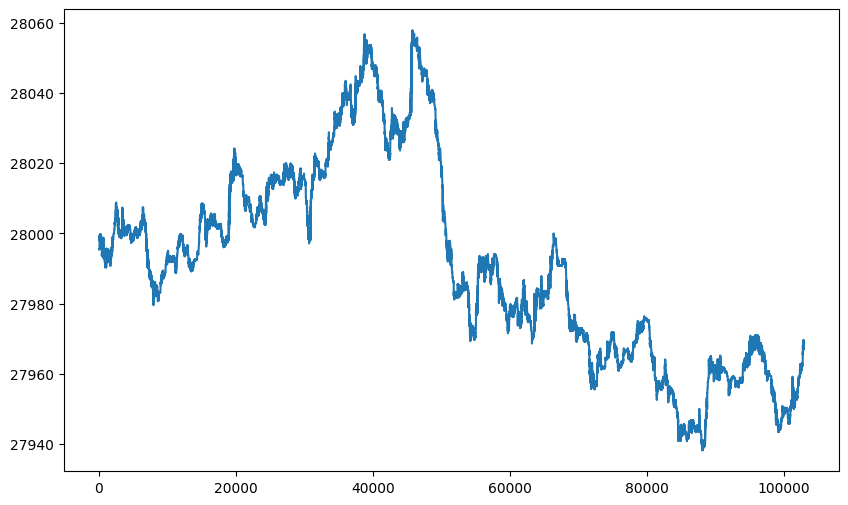

In [10]:
figure = plt.figure(figsize=(10,6))
plt.plot(df['microprice'])
plt.show()

In [11]:
X = df.drop(columns=['exec_time'])
Y = df['exec_time']

In [15]:
# Define the encoder
input_shape = X.shape[1:]
encoder_input = Input(shape=input_shape)
encoder_conv1 = Conv1D(32, kernel_size=2, activation='relu')(encoder_input)
encoder_lstm = LSTM(32, activation='relu')(encoder_conv1)
latent_dim = 32
encoder_output = Dense(latent_dim)(encoder_lstm)

encoder_model = Model(encoder_input, encoder_output)

# Define the decoder
decoder_input = Input(shape=(latent_dim,))
decoder_dense1 = Dense(32, activation='relu')(decoder_input)
decoder_reshape = Reshape((1, 32))(decoder_dense1)
decoder_conv1 = Conv1D(32, kernel_size=3, activation='relu', padding='same')(decoder_reshape)
output_dim = 32
decoder_output = Dense(output_dim, activation='sigmoid')(decoder_conv1)

decoder_model = Model(decoder_input, decoder_output)

# Combine the encoder and decoder into an autoencoder
autoencoder_input = Input(shape=input_shape)
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = Model(autoencoder_input, decoded)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mse')

# Train the model
autoencoder_model.fit(X, Y, epochs=3, batch_size=32)

Epoch 1/3
3113/3113 [==============================] - 13s 4ms/step - loss: 271.3825
Epoch 2/3
3113/3113 [==============================] - 12s 4ms/step - loss: 271.3693
Epoch 3/3
3113/3113 [==============================] - 12s 4ms/step - loss: 271.3694


# some experiements 

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LayerNormalization, Input, Dense, Dropout, Attention
from tensorflow.keras.models import Model

class DilatedCausalConvolution(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, dilation_rate):
        super(DilatedCausalConvolution, self).__init__()
        self.conv1d = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding='causal', activation='relu')
        self.layer_norm = LayerNormalization()

    def call(self, inputs):
        x = self.conv1d(inputs)
        x = self.layer_norm(x)
        return x

class LocallyAwareConvolutionalNetwork(tf.keras.layers.Layer):
    def __init__(self, num_filters, kernel_size, dilation_rates):
        super(LocallyAwareConvolutionalNetwork, self).__init__()

        # Create three Dilated Causal Convolutional layers with different dilation rates
        self.dcc_layers = [DilatedCausalConvolution(num_filters, kernel_size, dilation_rate)
                           for dilation_rate in dilation_rates]

    def call(self, inputs):
        outputs = [layer(tf.expand_dims(inputs, axis=1)) for layer in self.dcc_layers]
        return outputs

# Define Transformer model
def transformer_model(embedding_dim, num_heads, ff_dim, num_blocks, dropout_rate, input_shape):
    inputs = Input(shape=input_shape)

    # Multi-head self-attention layer
    x = Attention(use_scale=True, num_heads=num_heads)([inputs, inputs, inputs])
    x = Dropout(dropout_rate)(x)
    res = x + inputs

    # Feed-forward layer
    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout_rate)(x)
    res = x + res

    # Repeat the transformer block for the specified number of blocks
    for _ in range(num_blocks):
        x = Attention(use_scale=True, num_heads=num_heads)([res, res, res])
        x = Dropout(dropout_rate)(x)
        res = x + res

        x = Dense(ff_dim, activation="relu")(res)
        x = Dropout(dropout_rate)(x)
        res = x + res

    outputs = Dense(embedding_dim, activation="linear")(res)

    return Model(inputs=inputs, outputs=outputs)

In [41]:
# Example usage:
# Assuming LOB data has shape (99601, 22)
lob_data = tf.random.normal((99601, 22))  # Replace this with your actual LOB data

# Set hyperparameters
num_filters = 64
kernel_size = 3
dilation_rates = [1, 2, 4]
embedding_dim = 128
num_heads = 8
ff_dim = 128
num_blocks = 2
dropout_rate = 0.1

# Create the Locally Aware Convolutional Network
locally_aware_conv = LocallyAwareConvolutionalNetwork(num_filters, kernel_size, dilation_rates)

# Pass the LOB data through the Locally Aware Convolutional Network
queries, keys, values = locally_aware_conv(lob_data)

# Concatenate the outputs from the DCC layers
combined_features = tf.concat([queries, keys, values], axis=-1)

# Reshape to match the input shape expected by the Transformer model
combined_features = tf.reshape(combined_features, (-1, combined_features.shape[-1]))

# Create and compile the Transformer model
transformer = transformer_model(embedding_dim, num_heads, ff_dim, num_blocks, dropout_rate, combined_features.shape[1:])
transformer.compile(optimizer="adam", loss="mse")

TypeError: ('Keyword argument not understood:', 'num_heads')

In [42]:
!pip install --upgrade tensorflow

In [46]:
!pip show tensorflow

Name: tensorflow
Version: 2.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/gosa/Desktop/conda/miniconda3/envs/myenv/lib/python3.11/site-packages
Requires: tensorflow-macos
Required-by: 
